In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re

In [ ]:
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = data.data
labels = data.target
label_names = data.target_names

# Clean text
def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    return text

docs_cleaned = [preprocess(doc) for doc in documents]


In [13]:
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_count = count_vectorizer.fit_transform(docs_cleaned)
X_tfidf = tfidf_vectorizer.fit_transform(docs_cleaned)


In [14]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

def fit_models(X_count, X_tfidf, ks=[10, 20, 50]):
    lda_models = {}
    nmf_models = {}
    for k in ks:
        lda = LatentDirichletAllocation(n_components=k, random_state=42)
        nmf = NMF(n_components=k, random_state=42)
        lda_models[k] = lda.fit(X_count)
        nmf_models[k] = nmf.fit(X_tfidf)
    return lda_models, nmf_models

lda_models, nmf_models = fit_models(X_count, X_tfidf)


/Users/jenishkothari/Northeastern/DS5230_backup/myenv/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/jenishkothari/Northeastern/DS5230_backup/myenv/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [15]:
def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {', '.join(top_features)}")

# Print LDA K=20
print_top_words(lda_models[20], count_vectorizer.get_feature_names_out())


Topic #1: car, just, like, don, good, bike, time, ve, know, right, think, used, way, cars, new, engine, use, really, make, problem
Topic #2: book, books, read, know, like, just, time, don, theory, good, light, red, black, think, reference, stuff, really, little, used, universe
Topic #3: don, think, people, know, just, going, mr, president, like, did, said, ll, time, ve, want, say, make, stephanopoulos, believe, good
Topic #4: window, use, server, using, application, set, motif, display, widget, file, problem, program, x11, windows, manager, xterm, lib, does, sun, like
Topic #5: file, output, entry, program, use, section, line, wire, rules, info, ground, build, entries, circuit, code, echo, int, current, char, printf
Topic #6: people, does, think, don, believe, say, god, evidence, just, point, right, question, way, true, religion, like, know, fact, make, argument
Topic #7: government, key, people, israel, encryption, use, chip, law, public, clipper, like, keys, just, israeli, don, secur

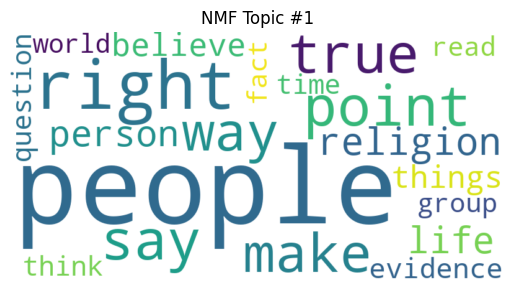

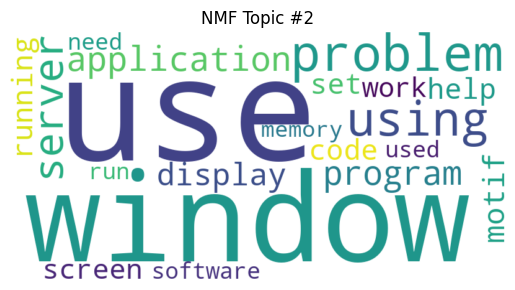

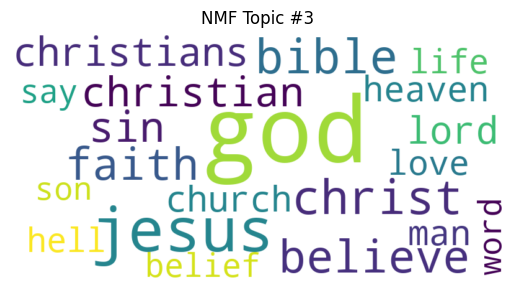

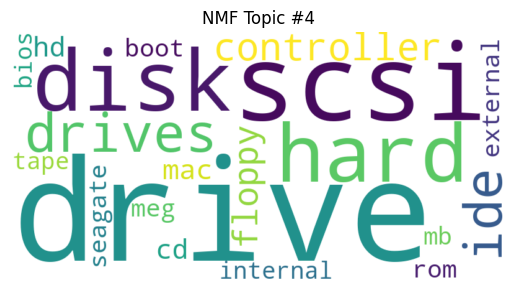

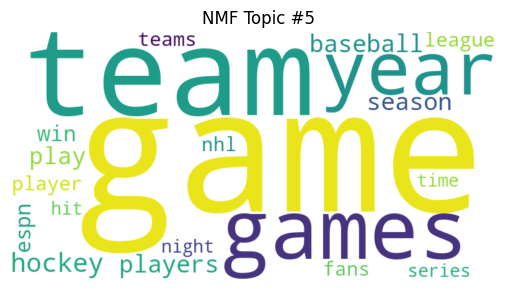

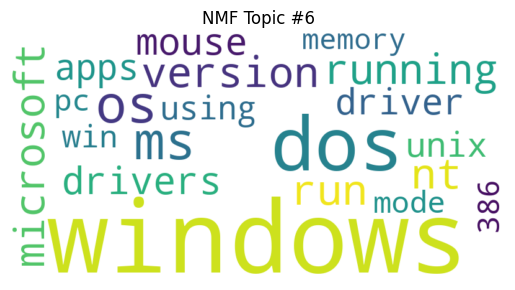

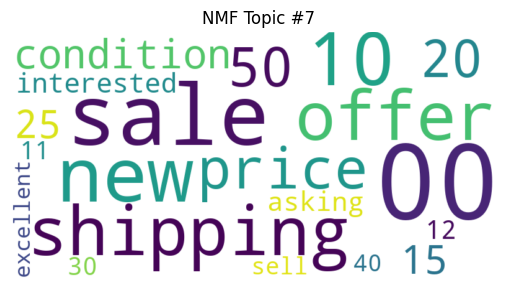

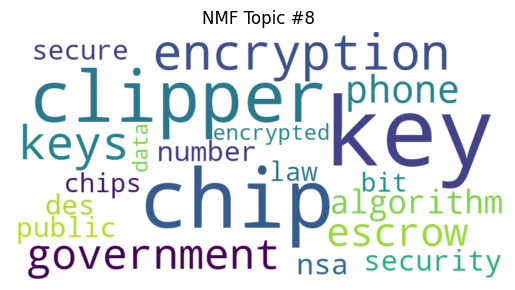

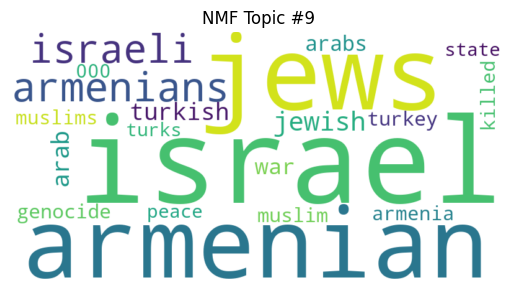

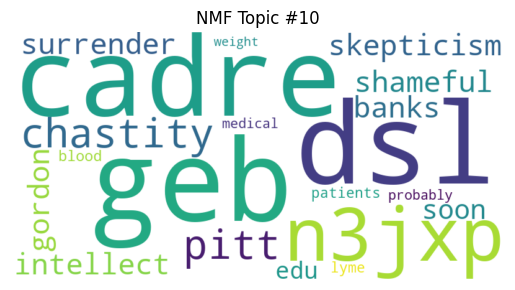

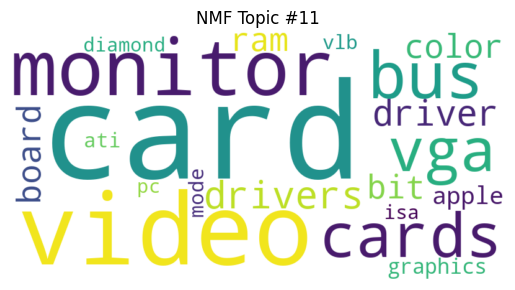

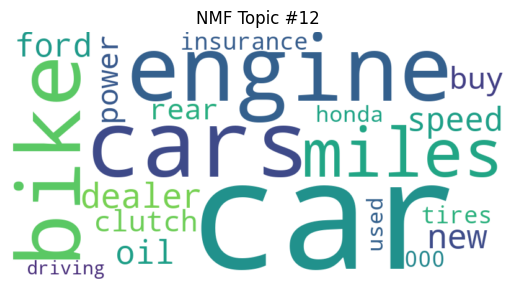

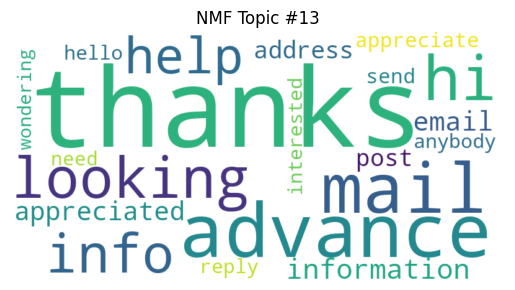

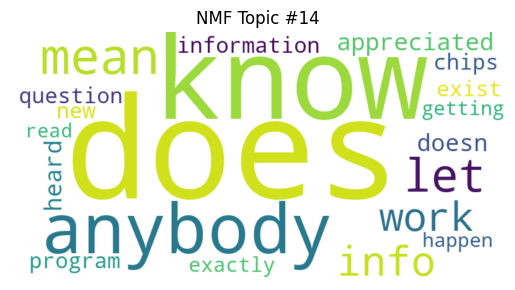

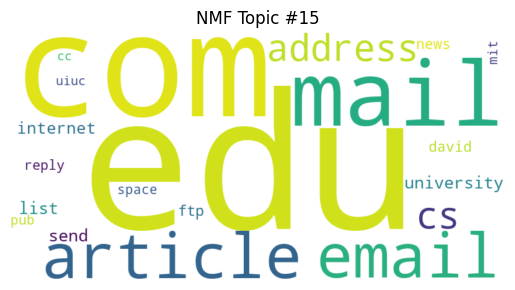

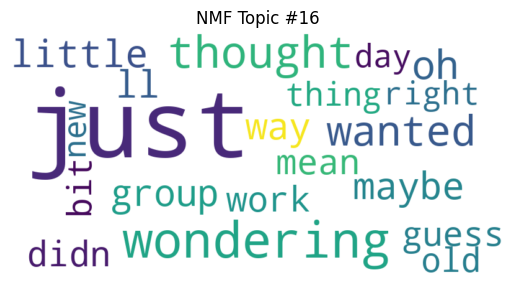

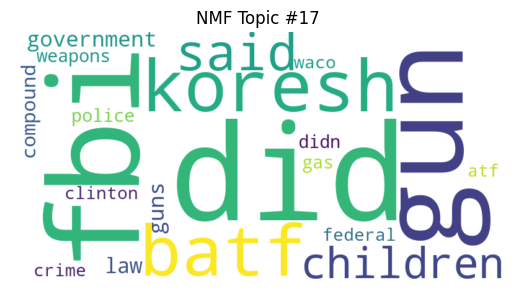

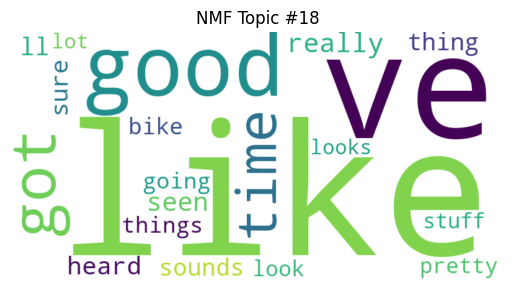

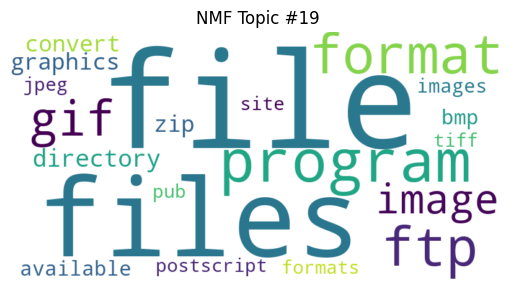

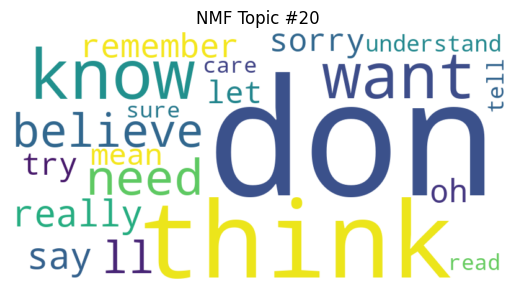

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds(model, feature_names, title_prefix="Topic"):
    for topic_idx, topic in enumerate(model.components_):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-20 - 1:-1]}
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure()
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{title_prefix} #{topic_idx + 1}")
        plt.show()

# Example: NMF (K=20)
plot_wordclouds(nmf_models[20], tfidf_vectorizer.get_feature_names_out(), "NMF Topic")


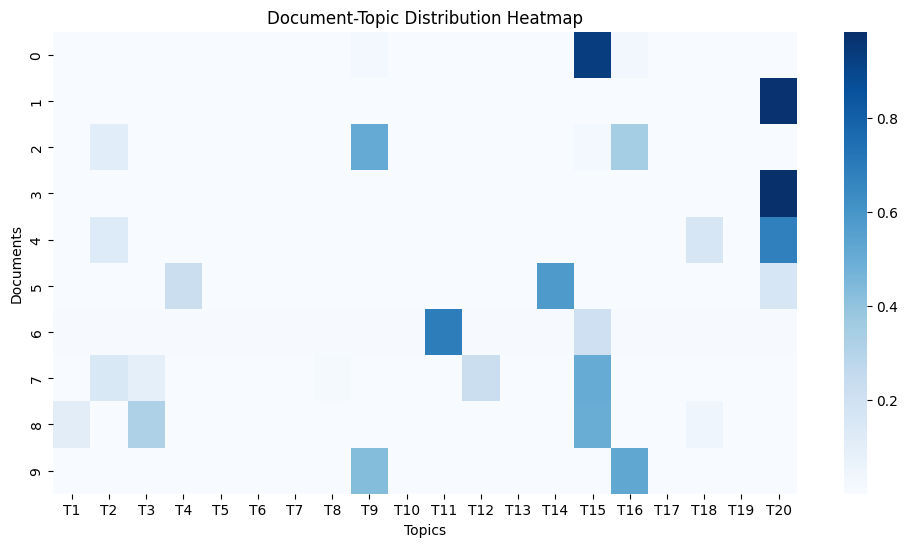

In [17]:
import seaborn as sns
import numpy as np

def plot_doc_topic_heatmap(model, X, num_docs=10):
    doc_topic_matrix = model.transform(X)
    plt.figure(figsize=(12, 6))
    sns.heatmap(doc_topic_matrix[:num_docs], cmap='Blues', xticklabels=[f'T{i+1}' for i in range(model.n_components)])
    plt.xlabel("Topics")
    plt.ylabel("Documents")
    plt.title("Document-Topic Distribution Heatmap")
    plt.show()

# Visualize LDA (K=20)
plot_doc_topic_heatmap(lda_models[20], X_count)
